# Stop Reinventing Pandas

In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['classic', 'ggplot', 'seaborn-poster', 'dean.style'])

![slide1](slides/slide1.jpg)

![slide2](slides/slide2.jpg)

![slide3](slides/slide3.jpg)

In [2]:
np.random.seed(314)

In [3]:
df_io = pd.read_csv('./data.csv',index_col=0,parse_dates=['date_'])
df_io.head()


,val_updated,date_,event_type
0,2018-10-09 17:01:30.662390+00:00,2018-10-09 17:01:30.662389,5
1,2018-10-09 17:01:30.687675+00:00,2018-10-09 17:01:30.687675,5
2,2018-10-09 17:03:23.952848+00:00,2018-10-09 17:03:23.952847,1
3,2018-10-09 17:05:42.327744+00:00,2018-10-09 17:05:42.327744,7
4,2018-09-24 16:36:38.177661+00:00,2018-10-09 17:06:29.708909,7


In [4]:
df = df_io.copy().sort_values('date_').set_index('date_').drop(columns='val_updated')
df.head()

,event_type
date_,
2018-10-09 17:01:30.662389,5
2018-10-09 17:01:30.687675,5
2018-10-09 17:03:23.952847,1
2018-10-09 17:05:42.327744,7
2018-10-09 17:06:29.708909,7


## First Hacks!
One Line is hard to read and prone to human error

In [5]:
df_io\
.copy()\
.sort_values('date_')\
.set_index('date_')\
.drop(columns='val_updated')\
.head()

,event_type
date_,
2018-10-09 17:01:30.662389,5
2018-10-09 17:01:30.687675,5
2018-10-09 17:03:23.952847,1
2018-10-09 17:05:42.327744,7
2018-10-09 17:06:29.708909,7


But it has a problem. You can't comment out and even comment in between

In [6]:
df_io\
.copy()\ # This is an inline comment
# This is a regular comment
.sort_values('date_')\
# .set_index('date_')\
.drop(columns='val_updated')\ 
.head()

SyntaxError: unexpected character after line continuation character (<ipython-input-6-9315cf10bf52>, line 1)

In [ ]:
df_io\
.copy()\ # This is an inline comment
# This is a regular comment
.sort_values('date_')\
# .set_index('date_')\
.drop(columns='val_updated')\ 
.head()

## The Penny Drops

In [7]:
# We can split these value inside ()
users = (134856, 195373, 295817, 294003, 262166, 121066, 129678, 307120, 258759, 277922, 220794, 192312, 318486, 314631, 306448, 297059,206892, 169046, 181703, 146200, 199876, 247904, 250884, 282989, 234280, 202520, 138064, 133577, 301053, 242157)

In [8]:

# We can also Split here
df = (df_io
    .copy() # This is an inline comment
    # This is a regular comment
    .sort_values('date_')
    .set_index('date_')
    .drop(columns='val_updated')   
)

df.head()

,event_type
date_,
2018-10-09 17:01:30.662389,5
2018-10-09 17:01:30.687675,5
2018-10-09 17:03:23.952847,1
2018-10-09 17:05:42.327744,7
2018-10-09 17:06:29.708909,7


## Map with dict
A dict is a callable

In [9]:
df.event_type.map(lambda x: x+3).head()

date_
2018-10-09 17:01:30.662389     8
2018-10-09 17:01:30.687675     8
2018-10-09 17:03:23.952847     4
2018-10-09 17:05:42.327744    10
2018-10-09 17:06:29.708909    10
Name: event_type, dtype: int64

In [10]:
# A dict is also a calleble
df['event_type'] = df.event_type.map({
    1:'A',
    5:'B',
    7:'C'
})
df.head()

,event_type
date_,
2018-10-09 17:01:30.662389,B
2018-10-09 17:01:30.687675,B
2018-10-09 17:03:23.952847,A
2018-10-09 17:05:42.327744,C
2018-10-09 17:06:29.708909,C


# Time Series


## Resample
How many events happen each hour?

### The Old Way

In [11]:
bad = df.copy()
bad['day'] = bad.index.date
bad['hour'] = bad.index.hour
(bad
.groupby(['day','hour'])
.count()
)

event_type
day        hour            
2018-10-09 17            83
           18            96
           20            91
           21            71
           22            84

* Many lines of code
* unneeded columns
* Index is not a time anymore
* **missing rows**

### A Better Way

In [12]:
df.resample('H').count()

,event_type
date_,
2018-10-09 17:00:00,83
2018-10-09 18:00:00,96
2018-10-09 19:00:00,0
2018-10-09 20:00:00,91
2018-10-09 21:00:00,71
2018-10-09 22:00:00,84


But it's even better on non-round intervals

In [13]:
rs = df.resample('10T').count()
rs.head()

,event_type
date_,
2018-10-09 17:00:00,7
2018-10-09 17:10:00,12
2018-10-09 17:20:00,16
2018-10-09 17:30:00,13
2018-10-09 17:40:00,15


## Slice Easily

In [14]:
rs.loc['2018-10-09 21',:]

,event_type
date_,
2018-10-09 21:00:00,11
2018-10-09 21:10:00,18
2018-10-09 21:20:00,16
2018-10-09 21:30:00,9
2018-10-09 21:40:00,7
2018-10-09 21:50:00,10


In [15]:
rs.loc[:'2018-10-09 18:31',:]

,event_type
date_,
2018-10-09 17:00:00,7
2018-10-09 17:10:00,12
2018-10-09 17:20:00,16
2018-10-09 17:30:00,13
2018-10-09 17:40:00,15
2018-10-09 17:50:00,20
2018-10-09 18:00:00,21
2018-10-09 18:10:00,22
2018-10-09 18:20:00,4


## Rolling, Expanding, EWM

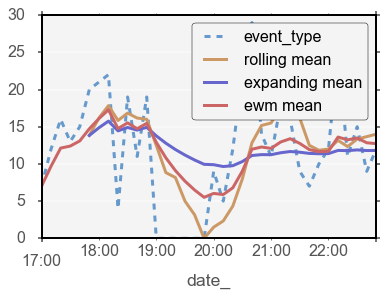

In [16]:
fig, ax = plt.subplots()
rs.plot(ax=ax,linestyle='--')
(rs
 .rolling(6)
 .mean()
 .rename(columns = {'event_type':'rolling mean'})
 .plot(ax=ax)
)

rs.expanding(6).mean().rename(columns = {'event_type':'expanding mean'}).plot(ax=ax)
rs.ewm(6).mean().rename(columns = {'event_type':'ewm mean'}).plot(ax=ax)


### With Apply
Intuitively, it's like GroupBy

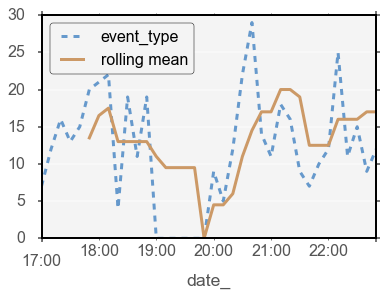

In [17]:
fig, ax = plt.subplots()
rs.plot(ax=ax,linestyle='--')
(rs
 .rolling(6)
 .apply(lambda x: (x.min() + x.max())/2)
 .rename(columns = {'event_type':'rolling mean'})
 .plot(ax=ax)
)

## Combine with GroupBy 🤯
We need to count per event type

In [18]:
per_event = (df
             .groupby('event_type')
             .resample('15T')
             .apply('count')
             .rename(columns={'event_type':'amount'})
            )
per_event

amount
event_type date_                      
A          2018-10-09 17:00:00       8
           2018-10-09 17:15:00       6
           2018-10-09 17:30:00       6
           2018-10-09 17:45:00       9
           2018-10-09 18:00:00       3
           2018-10-09 18:15:00       2
           2018-10-09 18:30:00       1
           2018-10-09 18:45:00      12
           2018-10-09 19:00:00       0
           2018-10-09 19:15:00       0
           2018-10-09 19:30:00       0
           2018-10-09 19:45:00       0
           2018-10-09 20:00:00       2
           2018-10-09 20:15:00       1
           2018-10-09 20:30:00       8
           2018-10-09 20:45:00      12
           2018-10-09 21:00:00       7
           2018-10-09 21:15:00       5
           2018-10-09 21:30:00       2
           2018-10-09 21:45:00       1
           2018-10-09 22:00:00      10
           2018-10-09 22:15:00      11
           2018-10-09 22:30:00       2
           2018-10-09 22:45:00       1
B          2018-10-09 17:00:00       4
           2018-10-09 17:15:00      11
           2018-10-09 17:30:00       9
           2018-10-09 17:45:00      10
           2018-10-09 18:00:00      18
           2018-10-09 18:15:00      11
...                                ...
           2018-10-09 21:30:00       7
           2018-10-09 21:45:00      10
           2018-10-09 22:00:00      12
           2018-10-09 22:15:00       7
           2018-10-09 22:30:00      12
           2018-10-09 22:45:00      14
C          2018-10-09 17:00:00       2
           2018-10-09 17:15:00       4
           2018-10-09 17:30:00       4
           2018-10-09 17:45:00      10
           2018-10-09 18:00:00       7
           2018-10-09 18:15:00       6
           2018-10-09 18:30:00       8
           2018-10-09 18:45:00       3
           2018-10-09 19:00:00       0
           2018-10-09 19:15:00       0
           2018-10-09 19:30:00       0
           2018-10-09 19:45:00       0
           2018-10-09 20:00:00       4
           2018-10-09 20:15:00       5
           2018-10-09 20:30:00      12
           2018-10-09 20:45:00       7
           2018-10-09 21:00:00       9
           2018-10-09 21:15:00       8
           2018-10-09 21:30:00       3
           2018-10-09 21:45:00       3
           2018-10-09 22:00:00       4
           2018-10-09 22:15:00       4
           2018-10-09 22:30:00       4
           2018-10-09 22:45:00       3

[72 rows x 1 columns]

# Stack, Unstack

### The Old way

In [19]:
pt=pd.pivot_table(per_event,values = 'amount',columns='event_type',index='date_')
pt.head()

event_type,A,B,C
date_,,,
2018-10-09 17:00:00,8,4,2
2018-10-09 17:15:00,6,11,4
2018-10-09 17:30:00,6,9,4
2018-10-09 17:45:00,9,10,10
2018-10-09 18:00:00,3,18,7


### A better way

In [20]:
pt = per_event.unstack('event_type')

pt.columns = pt.columns.droplevel()
pt.head()

event_type,A,B,C
date_,,,
2018-10-09 17:00:00,8,4,2
2018-10-09 17:15:00,6,11,4
2018-10-09 17:30:00,6,9,4
2018-10-09 17:45:00,9,10,10
2018-10-09 18:00:00,3,18,7


# Indexes (are the worst)

### The Old Way

In [21]:
us.reset_index().sort_values('event_type').set_index(['event_type','date_']).head()

NameError: name 'us' is not defined

### A better way

In [22]:
us.swaplevel().sort_index().head()

NameError: name 'us' is not defined

In [ ]:
# Check Equality
us.swaplevel().sort_index().equals(per_event)

# Clip
We need to contain the event to a minimum of 10 and maximum of 20


In [ ]:
cl = rs.copy()
cl['clipped'] = cl.event_type
cl.loc[cl.event_type<10,'clipped'] = 10
cl.loc[cl.event_type>20,'clipped'] = 20 # Need to chang4 in two places
# Needed 3 lines
cl.plot()


In [ ]:
cl = rs.copy()
cl['clipped'] = cl.clip(10,20)
cl.plot()

# Reindex

In [ ]:
pt.head()

In [ ]:
# I want to have a robust "online" function for this job.
# I know I have more event types, and I also want to choose the time window
etypes = list('ABCDZ')
idx = pd.date_range(start='2018-10-09 16:00:00',end='2018-10-09 23:59:00',freq='15T')
pt.reindex(idx, columns=etypes, fill_value=0).head()

In [4]:
### Let's put this in a function
def get_all_types_and_timestamps(df, min_date='2018-10-09 16:00:00',
                                 max_date='2018-10-09 23:59:00', etypes=list('ABCDZ')):
    ret = df.copy()
    time_idx = pd.date_range(start=min_date,end=max_date,freq='15T')
    idx = ret.index.union(time_idx)
    etypes = df.columns.union(set(etypes))
    ret = ret.reindex(idx, columns=etypes, fill_value=0)
    return ret

# Method Chaining

## Assign

In [ ]:
pt.assign(mean_all = pt.mean(axis=1)).head()

## Pipe
Think R's %>% (Or rather, avoid thinking about R)

In [ ]:
def do_something(df):
    ret = df.copy()
    ret['A'] = ret.A + 200
    return ret

In [ ]:
do_something(pt).head()

In [ ]:
# Think R's %>% (Or rather, avoid thinking about R)
pt.pipe(do_something).head(5)

# Beautiful Code Tells a Story

In [5]:
from my_utils import *
df = (pd
      .read_csv    ('./data.csv', index_col=0, parse_dates=['date_'])
      .assign      (event_type=lambda df: df.event_type.map({1: 'A', 5: 'B', 7: 'C'}))
      .sort_values ('date_')
      .set_index   ('date_')
      .drop        (columns='val_updated')
      .groupby     ('event_type')
      .resample    ('15T')
      .apply       ('count')
      .rename      (columns={'event_type': 'amount'})
      .unstack     ('event_type')
      .pipe        (remove_multi_index)
      .pipe        (get_all_types_and_timestamps)
      .assign      (mean_event=lambda df: df.mean(axis=1))
      .loc         [:, ['mean_event']]
      .pipe        (make_sliding_time_windows, steps_back=6)
      .dropna      ()
      )

In [7]:
df.to_json('./df.json',orient='table')

In [6]:
df.head()

,mean_event,mean_event_1,mean_event_2,mean_event_3,mean_event_4,mean_event_5,mean_event_6
2018-10-09 17:30:00,3.8,4.2,2.8,0.0,0.0,0.0,0.0
2018-10-09 17:45:00,5.8,3.8,4.2,2.8,0.0,0.0,0.0
2018-10-09 18:00:00,5.6,5.8,3.8,4.2,2.8,0.0,0.0
2018-10-09 18:15:00,3.8,5.6,5.8,3.8,4.2,2.8,0.0
2018-10-09 18:30:00,5.0,3.8,5.6,5.8,3.8,4.2,2.8


![greg](./slides/tweet.jpg)

In [ ]:
# Think R's %>% (Or rather, avoid thinking about R)
pt.pipe(get_all_types_and_timestamps, min_date='2018-10-09 14:00:00', etypes=['R']).head(10)

In [ ]:
def remove_multi_index(df):
    ret = df.copy()
    ret.columns = ret.columns.droplevel()
    return ret
    

In [ ]:
pt.rename(columns=str.lower).head()